In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x=np.linspace(0,50,501)

In [ ]:
y=np.sin(x)

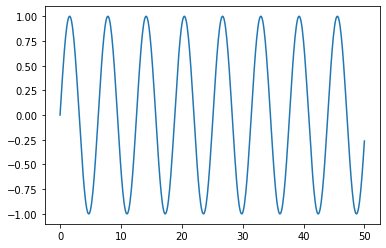

In [ ]:
plt.plot(x,y)

In [ ]:
df=pd.DataFrame(data=y,index=x,columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
len(df)

501

In [ ]:
test_prec=0.1
sep_data=int(len(df)-np.round(len(df)*test_prec))

In [ ]:
train=df.iloc[:sep_data]
test=df.iloc[sep_data:]

In [ ]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [ ]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#help(TimeseriesGenerator)

In [ ]:
#length=2
#batch = 1
#Generator= TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch)

In [ ]:
#len(scaled_train)

In [ ]:
#len(Generator)

In [ ]:
#X,y=Generator[1]

In [ ]:
#X

In [ ]:
#y

In [ ]:
#scaled_train

In [ ]:
length=25
batch = 1
Generator= TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [ ]:
n_features=1

In [ ]:
model=Sequential()
model.add(SimpleRNN(25,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 25)                675       
                                                                 
 dense_10 (Dense)            (None, 1)                 26        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(Generator,epochs=5)

Epoch 1/5


<ipython-input-245-601b4759a806>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(Generator,epochs=5)


426/426 [==============================] - 3s 6ms/step - loss: 0.0098
Epoch 2/5
426/426 [==============================] - 3s 6ms/step - loss: 1.8049e-04
Epoch 3/5
426/426 [==============================] - 2s 6ms/step - loss: 7.0246e-05
Epoch 4/5
426/426 [==============================] - 2s 6ms/step - loss: 1.1215e-04
Epoch 5/5
426/426 [==============================] - 2s 6ms/step - loss: 4.5201e-05


In [ ]:
losses=pd.DataFrame(model.history.history)

<Axes: >

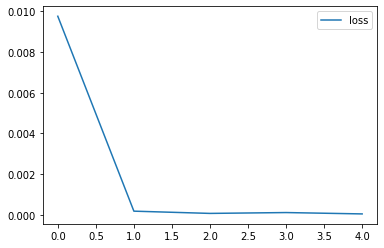

In [ ]:
losses.plot()

In [ ]:
first_evl_batc= scaled_train[-length:]
#first_evl_batc

In [ ]:
first_evl_batc= scaled_train[-length:].reshape((1,length,n_features))
#first_evl_batc

In [ ]:
model.predict(first_evl_batc)

1/1 [==============================] - 0s 154ms/step


array([[0.9597273]], dtype=float32)

In [ ]:
test_prediction=[]
first_evl_batch=scaled_train[-length:]
current_batch=first_evl_batch.reshape((1,length,n_features))

for i in range (len(test)):
  current_pred=model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 38ms/step


In [ ]:
true_prediction=scaler.inverse_transform(test_prediction)
#true_prediction

In [ ]:
test['prediction']=true_prediction

<ipython-input-253-c014802acac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=true_prediction


<Axes: >

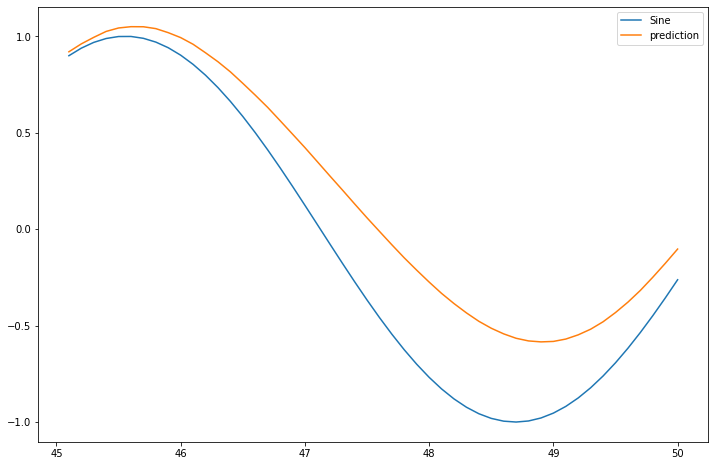

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)


In [ ]:
length=49
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
model=Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20


<ipython-input-259-fccb7ada08bd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


402/402 [==============================] - 13s 24ms/step - loss: 0.0112 - val_loss: 2.1024e-05
Epoch 2/20
402/402 [==============================] - 10s 25ms/step - loss: 1.8987e-04 - val_loss: 4.5426e-05
Epoch 3/20
402/402 [==============================] - 9s 23ms/step - loss: 1.0208e-04 - val_loss: 8.0096e-06
Epoch 4/20
402/402 [==============================] - 10s 25ms/step - loss: 1.4755e-04 - val_loss: 5.9569e-05
Epoch 5/20
402/402 [==============================] - 10s 24ms/step - loss: 6.1605e-04 - val_loss: 3.0948e-05


In [ ]:
test_prediction=[]
first_evl_batch=scaled_train[-length:]
current_batch=first_evl_batch.reshape((1,length,n_features))

for i in range (len(test)):
  current_pred=model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 92ms/step


<ipython-input-261-8e5e8b449764>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=true_prediction


<Axes: >

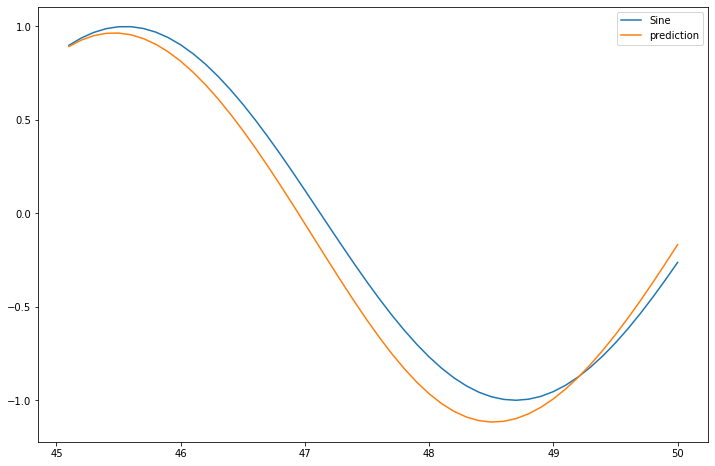

In [ ]:
true_prediction=scaler.inverse_transform(test_prediction)
test['LSTM_prediction']=true_prediction
test.plot(figsize=(12,8))

In [ ]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [ ]:
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)


In [ ]:
model=Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


<ipython-input-267-063492f5aede>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


452/452 [==============================] - 13s 23ms/step - loss: 0.0134
Epoch 2/5
452/452 [==============================] - 13s 28ms/step - loss: 1.4349e-04
Epoch 3/5
452/452 [==============================] - 12s 28ms/step - loss: 2.9137e-04
Epoch 4/5
452/452 [==============================] - 10s 22ms/step - loss: 1.3540e-04
Epoch 5/5
452/452 [==============================] - 10s 23ms/step - loss: 5.3198e-04


In [ ]:
forecast=[]
first_evl_batch=scaled_train[-length:]
current_batch=first_evl_batch.reshape((1,length,n_features))

for i in range (25):
  current_pred=model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
forecast=scaler.inverse_transform(forecast)

In [ ]:
forecast_index=np.arange(50.1,52.6,step=0.1)
forecast

array([[ 0.899272  ],
       [ 0.93569563],
       [ 0.96203197],
       [ 0.97808456],
       [ 0.98381991],
       [ 0.97935807],
       [ 0.9649478 ],
       [ 0.94094807],
       [ 0.90780231],
       [ 0.8660205 ],
       [ 0.8161584 ],
       [ 0.75880417],
       [ 0.69456852],
       [ 0.62407551],
       [ 0.54796027],
       [ 0.46686833],
       [ 0.38145794],
       [ 0.29240431],
       [ 0.20040504],
       [ 0.10618826],
       [ 0.01051821],
       [-0.0857973 ],
       [-0.18190162],
       [-0.27688903],
       [-0.36980614]])

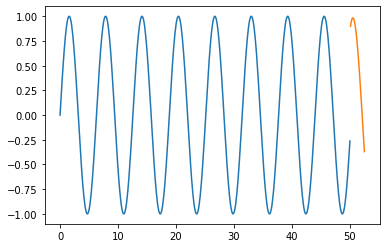

In [ ]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)